### Importing Libraries

In [1]:
import cv2
import os
import numpy as np
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D
from keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt

trial 3

### Data Preprocessing

In [2]:
data_path ='Dataset/Knee_image_data'
categories = os.listdir(data_path)
labels=[i for i in range(len(categories))]

label_dict=dict(zip(categories,labels)) #empty dictionary
print("Dictionary:", label_dict)
print("Categories:", categories)
print("Labels:", labels)

Dictionary: {'Stage_0': 0, 'Stage_1': 1, 'Stage_2': 2, 'Stage_3': 3, 'Stage_4': 4}
Categories: ['Stage_0', 'Stage_1', 'Stage_2', 'Stage_3', 'Stage_4']
Labels: [0, 1, 2, 3, 4]


In [3]:
img_size=256
data=[]
label=[]

for category in categories:
    folder_path=os.path.join(data_path,category)
    img_names=os.listdir(folder_path)
        
    for img_name in img_names:
        img_path=os.path.join(folder_path,img_name)
        img=cv2.imread(img_path)
        try:
            gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  
            resized=cv2.resize(gray,(img_size,img_size))
            #resizing the image  into 256 x 256, since we need a fixed common size for all the images in the dataset
            data.append(resized)
            label.append(label_dict[category])
            #appending the image and the label(categorized) into the list (dataset)
        except Exception as e:
            print('Exception:',e)
            #if any exception rasied, the exception will be printed here. And pass to the next image

In [4]:
data=np.array(data)/255.0
data=np.reshape(data,(data.shape[0],img_size,img_size,1))
label=np.array(label)

new_label=np_utils.to_categorical(label)

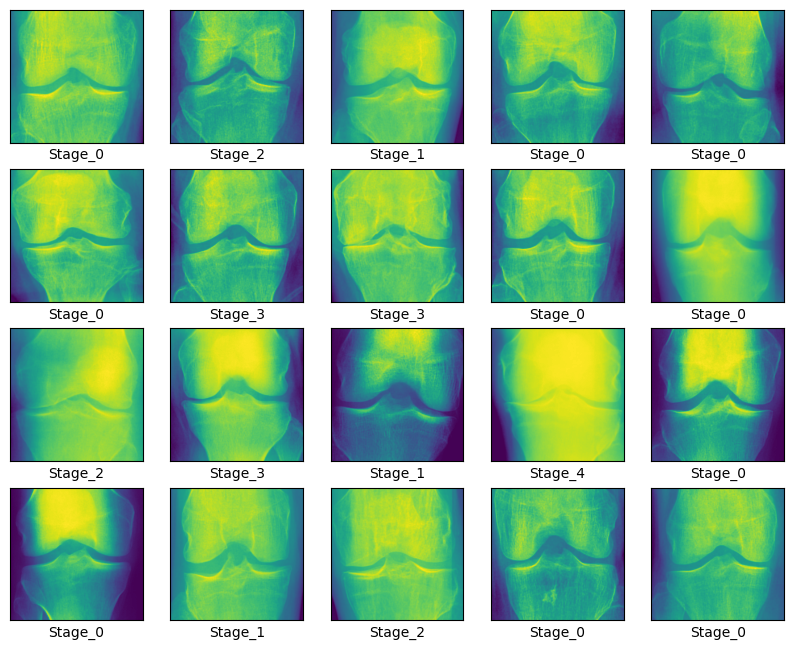

In [5]:
x_train,x_test,y_train,y_test=train_test_split(data,new_label,test_size=0.1)
plt.figure(figsize=(10,10))
for i in range(20):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(np.squeeze(x_test[i]))
    plt.xlabel(categories[np.argmax(y_test[i])])
plt.show()

### Model Building

In [6]:
model=Sequential()

model.add(Conv2D(128,(3,3),input_shape=data.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

# model.add(Conv2D(64,(3,3)))
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dropout(0.2))

model.add(Dense(128,activation='relu'))

model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))

model.add(Dense(5,activation='softmax')) # Output Layer

# Compile the Model
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 128)     1280      
                                                                 
 activation (Activation)     (None, 254, 254, 128)     0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 128)    0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      36896     
                                                                 
 activation_1 (Activation)   (None, 125, 125, 32)      0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                    

In [8]:
history=model.fit(x_train,y_train,epochs=100,validation_split=0.2)

Epoch 1/100
 34/202 [====>.........................] - ETA: 8:15 - loss: 1.6046 - accuracy: 0.3575

KeyboardInterrupt: 